# Logistic Regression
Sean Wade

In [19]:
from __future__ import division, print_function
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.datasets as datasets
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [20]:
%matplotlib inline
sns.set_style('dark')

## Generate the data

In [21]:
data, labels = datasets.make_moons(3000, noise=.2)
x_train, x_test, y_train, y_test = train_test_split(data, labels)

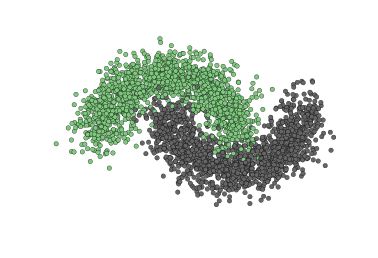

In [47]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=cm.Accent)
plt.axis('off')
plt.show()

## Logistic Regression

In [23]:
class MyLogisticRegression():
    """ My implementation of Logistic Regresssion. This includes with and 
    without regularization.
    """
    
    def _sigmoid(self, x):
        """ Vectroized sigmoid function. """
        return 1 / (1 + np.exp(-x))
    
    
    def fit(self, data, labels, reg=0, bias=True):
        """ Train the logistic regression classifier.
        Args:
          data : (np.array) Data of shape (n,d)
          labels : (np.array) Vector of labels, (n,)
          reg : (float) Regularization term, default 0 for no regularization
          bias : (bool) Use a bias, default True
        """
        n, d = data.shape
        
        # Add ones for bias
        data = np.hstack((np.ones((n,1)), data))
        
        negLogLiklyhood = lambda w: -np.sum(labels*np.log(1e-20 + self._sigmoid(data.dot(w))) \
                                            + (1-labels)*np.log(1e-20+ 1-self._sigmoid(data.dot(w)))) \
                                            + (reg * np.dot(w[1:], w[1:]))
        self.w = opt.minimize(negLogLiklyhood, np.random.random(d+1), method='L-BFGS-B').x


        
    def predict(self, data, binary=True, threshold=.5):
        """ Predict using logistic regression.
        Args:
          data : (np.array) Data to predict.
          bindary : (bool) True outputs predicted class only, no probability.
          threshold : (float) The probability threshold for classification.
        Returns:
          probs : (np.array) returns a vector of classification of probabilitys"""
        data = np.hstack((np.ones((data.shape[0], 1)), data))
        probs =  self._sigmoid(np.dot(data, self.w))
        if binary:
            probs[probs > threshold] = 1
            probs[probs < threshold] = 0
        return probs

## Compare Models

#### My Model

In [24]:
myModel = MyLogisticRegression()
myModel.fit(x_train, y_train, reg=0)
y_pred = myModel.predict(x_test)

In [25]:
myModel.w[1:]

array([ 1.23234251, -4.96813441])

In [26]:
accuracy_score(y_test, y_pred)

0.872

#### Sci-kit Lean

In [27]:
model = LogisticRegression(C=1e10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [28]:
model.coef_

array([[ 1.23231324, -4.96795613]])

In [29]:
accuracy_score(y_test, y_pred)

0.872

#### Time Comparison

In [12]:
%%timeit
myModel = MyLogisticRegression()
myModel.fit(x_train, y_train, reg=0)
y_pred = myModel.predict(x_test)

100 loops, best of 3: 6.94 ms per loop


In [13]:
%%timeit
model = LogisticRegression(C=1e10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

100 loops, best of 3: 1.83 ms per loop


## How Regularization Effects Classifier

By adding a punishment is the W values get to large we introduce regularization.  This is very useful in preventing overfitting and making data robust to outliers.  Notice bellow that as we increase the regularization term the weights are forced to be smaller.

In [36]:
reg_list = [10**x for x in range(-15,16)]
for reg in reg_list:
    model = MyLogisticRegression()
    model.fit(x_train, y_train, reg=reg)
    print("W values: {}".format(model.w[1:]))

W values: [ 1.23234701 -4.96815142]
W values: [ 1.23234742 -4.96815359]
W values: [ 1.23234749 -4.9681469 ]
W values: [ 1.2323499  -4.96815056]
W values: [ 1.23236641 -4.96814105]
W values: [ 1.23235032 -4.96817197]
W values: [ 1.23233024 -4.96815594]
W values: [ 1.23235566 -4.96816864]
W values: [ 1.23234662 -4.96815104]
W values: [ 1.23234672 -4.9681555 ]
W values: [ 1.23234778 -4.96815742]
W values: [ 1.23234423 -4.96809656]
W values: [ 1.2322955  -4.96765125]
W values: [ 1.23193926 -4.96295827]
W values: [ 1.22837364 -4.91706901]
W values: [ 1.19944271 -4.5352015 ]
W values: [ 1.08937566 -3.0062603 ]
W values: [ 0.77329286 -1.08178228]
W values: [ 0.217623   -0.19237606]
W values: [ 0.02681054 -0.02158361]
W values: [ 0.00274431 -0.00218656]
W values: [ 0.00027507 -0.00021894]
W values: [  2.75055989e-05  -2.19041087e-05]
W values: [  2.74618369e-06  -2.19406895e-06]
W values: [  2.75071057e-07  -2.20372281e-07]
W values: [  2.19800402e-08  -2.64901487e-08]
W values: [  2.52880740e

## Visualize the Results

In [45]:
def print_decision_boundry(X, Y,model, h=.02):
    plt.figure(figsize=(8,8))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Accent)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Accent)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

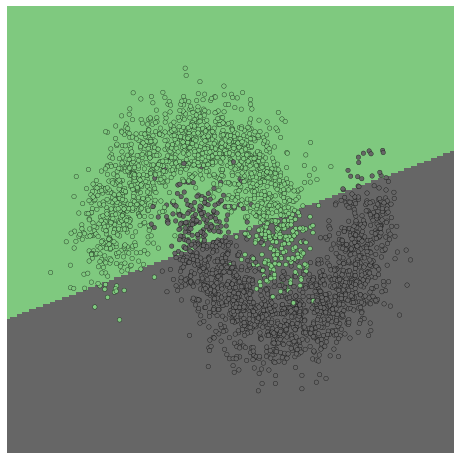

In [46]:
model = MyLogisticRegression()
model.fit(x_train, y_train, reg=1)
y_pred = myModel.predict(x_test)
print_decision_boundry(data,labels, model)

This is a pretty good fit, but it is easy to see the limitation that logistic regression can only fit hyperplanes to the data.

## Multi Class 

While the above code only deals with binary classification, logistic regression can easily be extended to multi-label classification.  This is commonly known as the softmax.

In [54]:
X, Y = datasets.make_blobs(n_features=2, centers=3, n_samples=2000)

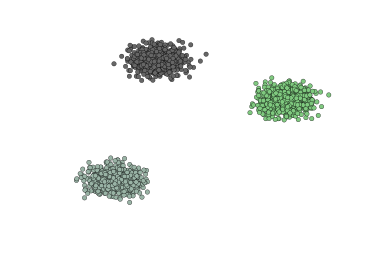

In [55]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap=cm.Accent)
plt.axis('off')
plt.show()

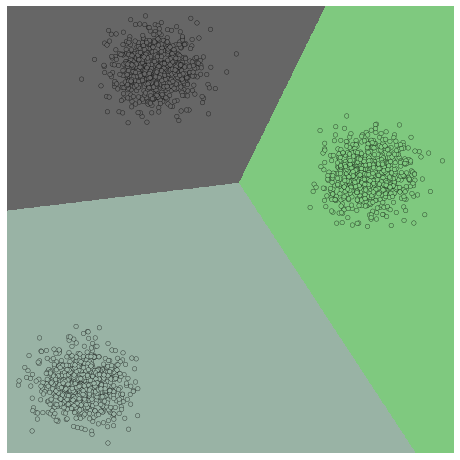

In [56]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)
print_decision_boundry(X,Y, model=logreg)